In [25]:
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import pdb

# supporting:

sys.path.insert(0,'..')
from config import global_config
from dataset import LaneNetDataset
from model.lanenet_model import LaneNet

In [26]:
training_file = '/home/ubuntu/dev/LaneNet-Pytorch/data/training_data/train.txt'
CFG = global_config.cfg

In [27]:
dataset = LaneNetDataset(training_file, CFG, True)
inputs = next(iter(dataset))  # (src, binary, instance)

### Testing

In [28]:
lane_net = LaneNet(use_cuda=True)

In [29]:
checkpoint = torch.load('../model/saved_model/lanenet_150.pth')
lane_net.load_state_dict(checkpoint['model_state_dict'])

In [30]:
src = inputs[0].unsqueeze(0).cuda()

In [31]:
lane_net.cuda()

lane_net.eval()

LaneNet(
  (encoder): VGGEncoder(
    (features): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

In [32]:
binary_seg_ret, pix_embedding = lane_net.inference(src)

In [33]:
import torchvision.transforms.functional as VF
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

torch.Size([1, 256, 512])

In [34]:
binary_seg = binary_seg_ret.cpu()
binary = VF.to_pil_image(binary_seg.int())

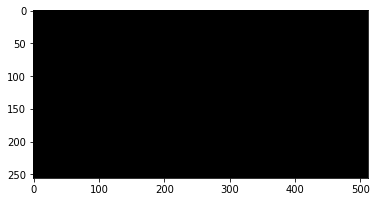

In [35]:
plt.imshow(binary)

Not trained :(